20201215
solve magia record mental weight

In [1]:
import numpy as np
import time
#from itertools import combinations, permutations
import random

In [2]:
LL = lambda x: [[i] for i in x]#list the list

In [3]:
def II(result,iil,Nbr):
    '''
    iteration rapid increase
    iil: II List; Nbr: length of result
    To call it, II([[]],LL(range(1,point+2)),Nbr-1)
    '''
    result2=[]
    for x in iil:
        #print(result,iil)
        result2 += [subset + x for subset in result]
    if len(result2[0])==Nbr: return result2
    #collecting
    ALL=[]
    for the in result2:
        a=II([the],LL(range(max(the),iil[-1][0]+1)),Nbr)
        for a2 in a:
            ALL.append(a2)
    return ALL

In [4]:
def DP(point,Nbr):
    '''
    math, distribute points to diff Nbr subplots, from 0 to max. Nbr >=2, point >=2
    rep: re-calculate parameters.
    '''
    c=[]
    for i2 in II([[]],LL(range(1,point+2)),Nbr-1):
        d=[i2[0]-1]+list(np.diff(i2))+[point-i2[-1]+1]
        #f=d.copy()
        #f.reverse()
        c.append(d)
        #c.append(f)
        #temp=[]#remove repeated. https://blog.csdn.net/Jerry_1126/article/details/79843751
        #[temp.append(i) for i in c if not i in temp]
    return c#temp

In [5]:
data=np.loadtxt('magiarecordmental.csv','str',delimiter=',')

In [6]:
#data

In [7]:
data[0,0]=data[0,0][1:]

In [8]:
#data

In [9]:
def SB(data,Vl,point,weights,skipNbr=9999):
    '''
    data,verify letter (after check this plot), point unused (before check this plot), 
    weights gained from this point (after check this plot), comments added (from this plot)
    example: SB(data,'1','15',300,', the plot name is 1')
    skipNbr: if a weights is 9999, then weights = 0 and dont use point
    '''
    #print(weights)
    if point==0: return 0, ''
    point -= 1
    if weights==skipNbr:#skip this plot
        point += 1
        weights = 0
    Vls=data[:,0]#verify letter list
    PSBL=[]#search branch list prepare (for distribution)
    SBL=[]#search branch list
    for i in range(len(Vls)):
        iV=Vls[i][:-1]#to compare
        if iV==Vl:#record weight distribution
            #iweights=
            #SBL.append(SB(data,Vls[i],point,weights+float(data[i,1]),co+','+Vls[i]))
            PSBL.append(i)
    #print(Vl,PSBL)
    if len(PSBL)==0:#no subplot
        return weights, ', '+Vl
    elif len(PSBL)==1:#have 1 subplot
        #print(SB(data,Vls[PSBL[0]],point,float(data[PSBL[0],1])))
        [PSBLw, PSBLco]=SB(data,Vls[PSBL[0]],point,float(data[PSBL[0],1]))
        return weights+PSBLw, ', '+Vl+PSBLco
    else:#start distribution
        if point==0: return weights, ', '+Vl#can not distribute
        if point==1:#simple distribute
            for i2 in PSBL:
                #print('i2')
                SBL.append(SB(data,Vls[i2],1,float(data[i2,1])))#deal with SBL with point>1
        else:
            #print(point,PSBL)
            PL=DP(round(point),len(PSBL))#prepare the point list
            for thePL in PL:
                thePLw=0
                thePLco=''
                for i4, i5 in zip(thePL, PSBL):
                    [i4a, i4b]=SB(data,Vls[i5],i4,float(data[i5,1]))
                    thePLw += i4a
                    thePLco = thePLco + i4b
                #print('i4')
                SBL.append([thePLw, thePLco])
            
        #print(SBL)
        Cmax=max([choose[0] for choose in SBL])#check highest weight
        
        for i3 in SBL:
            if i3[0]==Cmax:
                i3a=weights+Cmax
                i3b=', '+Vl+i3[1]
                
                return i3a, i3b 

In [10]:
#SB(data,'1',11,0.004200672)

In [18]:
SB(data,'',12,9999)

(1.089354467,
 ', , 1, 10, 102, 3, 31, 310, 5, 51, 512, 5120, 511, 5110, 51100, 511000, 5110000')

Above is for simple mental. For complicate mental such as Iroha. Use below to be faster.

In [11]:
Faster=np.array([range(1,7),[13,38-13-5,50-38,63-50-4,88-63-6,100-88]])

In [12]:
Dic={}

In [13]:
for i in Faster[0]:
    Dic[i]=[]
    data2=[]
    for i3 in data:
        if i3[0][0]==str(i):
            data2.append(i3)
    for i2 in range(1,Faster[1][i-1]+1):
        t=time.time()
        Dic[i].append(SB(np.array(data2),'',i2,9999))
        print('Dictionary of branch '+str(i)+' in point '+str(i2)+' finishes uses '+str(time.time()-t)+' sec.\n')

Dictionary of branch 1 in point 1 finishes uses 0.0 sec.

Dictionary of branch 1 in point 2 finishes uses 0.0 sec.

Dictionary of branch 1 in point 3 finishes uses 0.0 sec.

Dictionary of branch 1 in point 4 finishes uses 0.0 sec.

Dictionary of branch 1 in point 5 finishes uses 0.0 sec.

Dictionary of branch 1 in point 6 finishes uses 0.0 sec.

Dictionary of branch 1 in point 7 finishes uses 0.00802159309387207 sec.

Dictionary of branch 1 in point 8 finishes uses 0.0 sec.

Dictionary of branch 1 in point 9 finishes uses 0.0 sec.

Dictionary of branch 1 in point 10 finishes uses 0.010653018951416016 sec.

Dictionary of branch 1 in point 11 finishes uses 0.00889277458190918 sec.

Dictionary of branch 1 in point 12 finishes uses 0.0004928112030029297 sec.

Dictionary of branch 1 in point 13 finishes uses 0.010135173797607422 sec.

Dictionary of branch 2 in point 1 finishes uses 0.0 sec.

Dictionary of branch 2 in point 2 finishes uses 0.0 sec.

Dictionary of branch 2 in point 3 finishes

In [14]:
Dic

{1: [(0.004200672, ', , 1'),
  (0.014200672000000001, ', , 1, 10'),
  (0.026200671999999998, ', , 1, 10, 102'),
  (0.032574158000000006, ', , 1, 10, 102, 1020'),
  (0.038469633, ', , 1, 10, 101, 102, 1020'),
  (0.043750478, ', , 1, 10, 101, 1010, 102, 1020'),
  (0.052408392000000005, ', , 1, 10, 101, 1010, 10100, 101000, 1010000'),
  (0.064408392, ', , 1, 10, 101, 1010, 10100, 101000, 1010000, 102'),
  (0.070781878, ', , 1, 10, 101, 1010, 10100, 101000, 1010000, 102, 1020'),
  (0.07582275,
   ', , 1, 10, 101, 1010, 10100, 101000, 1010000, 102, 1020, 10200'),
  (0.08192453899999999,
   ', , 1, 10, 103, 1030, 10300, 101, 1010, 10100, 101000, 1010000, 102'),
  (0.088298025,
   ', , 1, 10, 103, 1030, 10300, 101, 1010, 10100, 101000, 1010000, 102, 1020'),
  (0.09333889699999999,
   ', , 1, 10, 103, 1030, 10300, 101, 1010, 10100, 101000, 1010000, 102, 1020, 10200')],
 2: [(0.005040872, ', , 2, 23, 230, 2300, 23001, 230012'),
  (0.011733033, ', , 2, 23, 230, 2300, 23001, 230012, 2300120'),
  

In [15]:
Faster[1]

array([13, 20, 12,  9, 19, 12])

In [16]:
BG=np.array([sum(Faster[1][:i]) for i in range(6)])#background

In [17]:
for i in range(1,7):
    Dic[i].append([0])#a little skill

In [18]:
def R1():#random 1
    a=random.random()*85
    return sum((a-BG)>0)

In [19]:
def R2():
    a=[]
    for i in range(45):
        a.append(R1())
    a=np.array(a)
    if sum(a==1)>13 or sum(a==2)>20 or sum(a==3)>12 or sum(a==4)>9 or sum(a==5)>19 or sum(a==6)>12:
        return -9999,[1,1,1,1,1,1]
    CL=[sum(a==1), sum(a==2), sum(a==3),sum(a==4),sum(a==5),sum(a==6)]#check list
    W=0
    for i2 in range(1,7):
        W += Dic[i2][CL[i2-1]-1][0]
    return W,CL
    

# Need 15 min

In [20]:
WL=[]
CLL=[]
for i in range(500000): 
    a,b=R2()
    WL.append(a)
    CLL.append(b)

In [21]:
max(WL)

1.326714685

In [22]:
WL=np.array(WL)
CLL=np.array(CLL)

CLL[WL==max(WL)]

array([[9, 8, 3, 9, 9, 7],
       [9, 8, 3, 9, 9, 7]])

My Iroha: 9, 8, 3, 9, 9, 7
1 (0.070781878, ', , 1, 10, 101, 1010, 10100, 101000, 1010000, 102, 1020')
2 (0.059969647,', , 2, 21, 210, 2101, 21010, 23, 230, 2300, 23002, 230020, 2300200, 23002000')
3 (0.022994264, ', , 3, 31, 310')
4 (0.064607266, ', , 4, 40, 403, 4030, 40300, 403000, 402, 4020, 40200, 402000, 4020000') (active all)
5 (1.062347081, ', , 5, 52, 520, 5202, 52020, 520200, 5202000, 51, 512, 5120, 511, 5110, 51100, 511000, 5110000')
6 (0.046014549, ', , 6, 61, 610, 6100, 61000, 610000, 6100000')

In [23]:
len(WL)

500000

In [24]:
WL2=WL[WL!=-9999]

In [25]:
len(WL2)

479904

Text(0, 0.5, 'Weight')

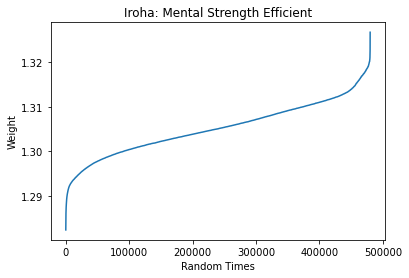

In [35]:
import matplotlib.pyplot as plt

plt.plot(np.sort(WL2,-1)[30:])
plt.title('Iroha: Mental Strength Efficient')
plt.xlabel('Random Times')
plt.ylabel('Weight')